In [150]:
import pandas as pd
import numpy as np

data = pd.read_csv("./chap6/data/energydata.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


In [151]:
data["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d %H:%M:%S')
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


In [152]:
data = data[["date", "Appliances"]]
data.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


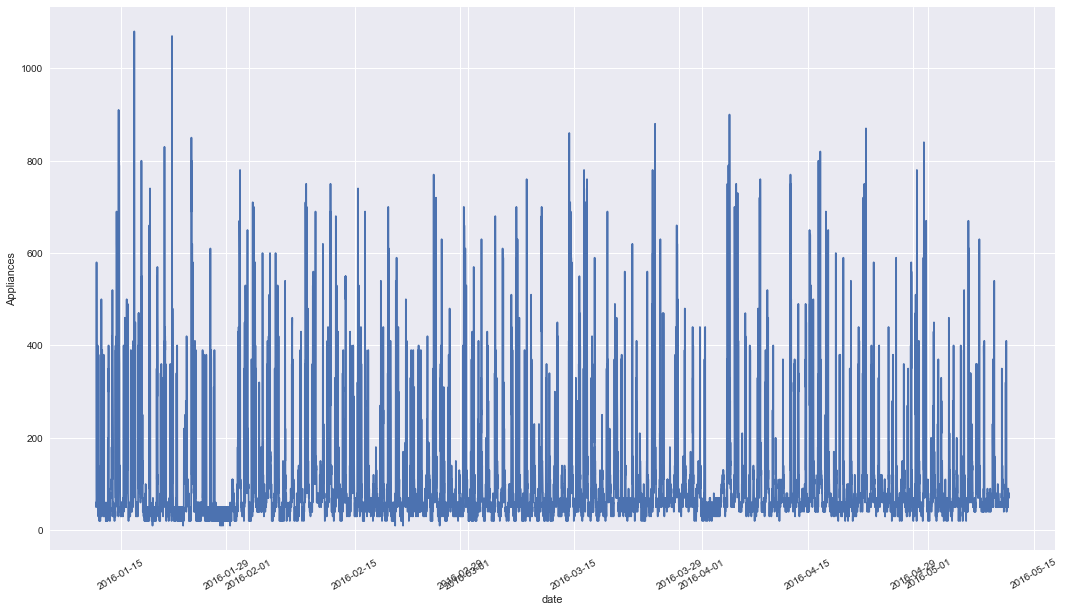

In [153]:
import matplotlib.pyplot as plt
import seaborn 
plt.style.use("seaborn")
%matplotlib inline

plt.figure(figsize = (18, 10))
plt.plot(data["date"], data["Appliances"])
#plt.xlim(200, 300)
plt.xlabel('date')
plt.ylabel('Appliances')
plt.xticks(rotation = 30)
plt.show()

## 3.2 k-NN方による教師データの作成

In [154]:
train = data[data['date'] < '2016-04-11 17:00:00']
test = data[data['date'] >= '2016-04-11 17:00:00']

train_app = train['Appliances'].as_matrix().reshape(-1, 1)
test_app = test['Appliances'].as_matrix().reshape(-1, 1)

In [155]:
from sklearn.preprocessing import MinMaxScaler

# 正規化
mc = MinMaxScaler()

train_app = mc.fit_transform(train_app)
test_app = mc.fit_transform(test_app)

/Users/hayashidaichi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/hayashidaichi/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
window_size = 144
train_app = train_app.flatten()
train_vec = []

for i in range(len(train) - window_size):
    train_vec.append(train_app[i:i+window_size])


In [20]:
pd.DataFrame(train_vec)

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794
5,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,...,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449
6,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,...,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607
7,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,0.074766,...,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607,0.065421
8,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,0.074766,0.056075,...,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607,0.065421,0.074766
9,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,0.074766,0.056075,0.065421,...,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607,0.065421,0.074766,0.056075


In [21]:
test_app = test_app.flatten()   # 一次元配列にする
test_vec = []

for i in range(len(test_app) - window_size):
    test_vec.append(test_app[i:i+window_size])
    


In [22]:
pd.DataFrame(test_vec)

,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882
5,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,0.105882,...,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882,0.882353
6,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,0.105882,0.105882,...,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882,0.882353,0.129412
7,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,0.105882,0.105882,0.117647,...,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882,0.882353,0.129412,0.141176
8,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,0.105882,0.105882,0.117647,0.117647,...,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882,0.882353,0.129412,0.141176,0.670588
9,0.094118,0.094118,0.082353,0.129412,0.141176,0.105882,0.105882,0.117647,0.117647,0.094118,...,0.435294,0.235294,0.129412,0.529412,0.705882,0.882353,0.129412,0.141176,0.670588,0.858824


In [23]:
from sklearn.neighbors import NearestNeighbors

train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

model = NearestNeighbors(n_neighbors = 1)
model.fit(train_vec)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=1, p=2, radius=1.0)

In [56]:
dist, o = model.kneighbors(test_vec)
dist /= np.max(dist)    # 距離を規格化

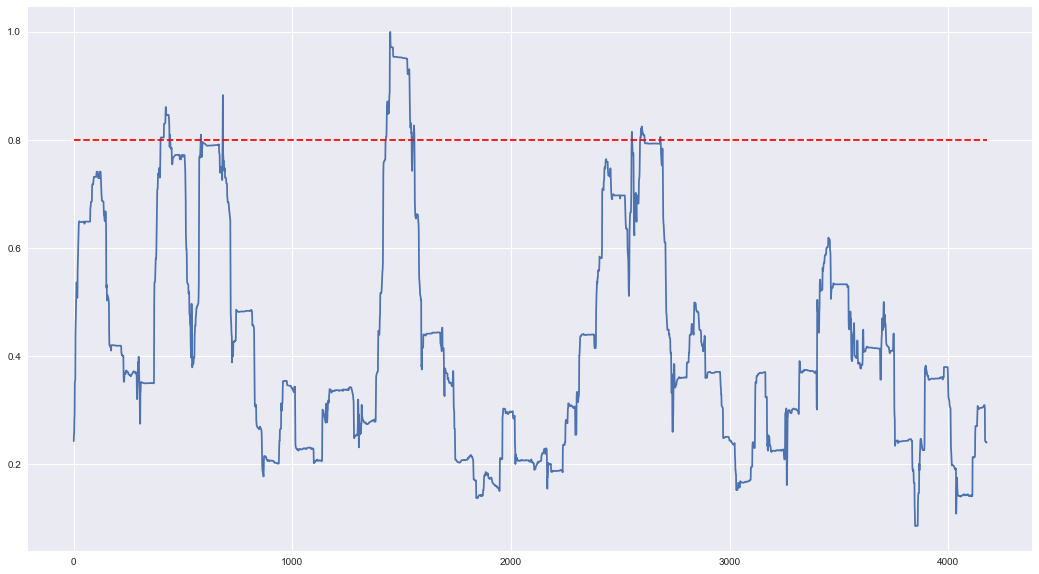

In [67]:
plt.figure(figsize = (18, 10))
plt.plot(dist)
plt.plot([0, len(dist)], [0.8,0.8], 'r--')
plt.show()

In [1]:
import numpy as np
a = [np.array(2.4), np.array(6.9), np.array(-1.2)]

In [3]:
a.sort()
a

[array(-1.2), array(2.4), array(6.9)]

In [10]:
np.mean(a[:2])

0.6

In [40]:
from dtw import dtw
%time
euclidean_norm = lambda x, y: np.abs(x - y)
d, _, _, _ = dtw(a, np.array([[0.0234]]), dist = euclidean_norm)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [29]:
a = train_vec.reshape(-1, 1)
b = test_vec.reshape(-1, 1)

In [38]:
d

0.06035053241763112

In [149]:
import numpy as np
from dtw import dtw

class Knn:
    
    def __init__(self, k, train_data, test_data, window_size):

        self.k = k
        self.train_data = train_data
        self.test_data = test_data
        self.window_size = window_size

        if not isinstance(self.train_data, np.ndarray):
            self.train_data = np.array(self.train_data)


        if not isinstance(self.test_data, np.ndarray):
            self.test_data = np.array(self.test_data)

        self.train_data = self.train_data.flatten()
        self.test_data = self.test_data.flatten()

    
    def train(self):

        '''
        スライド窓による部分時系列データの作成
        '''
        if self.window_size ==  None:
            self.train_vec = self.train_data
        
        else:
            self.train_vec = []
            for i in range(len(self.train_data) - self.window_size):
                self.train_vec.append(self.train_data[i:i + self.window_size])

            self.train_vec = np.array(self.train_vec)
            
        
        
    def detection(self, dist):

        '''
        distは用いる距離関数
        '''
        test_vec = []
        neighbor_distance = []
        
        if self.window_size == None:
            test_vec = self.test_data
        
        else:
            
            '''
            スライド窓による部分時系列データの作成
            '''
        
            for i in range(len(self.test_data) - self.window_size):
                test_vec.append(self.test_data[i:i + self.window_size])

            test_vec = np.array(test_vec)
            
        n = len(test_vec)

        if dist == 'Euclid':
            model = self.euclid_dist
            for i in range(n):
                distance = [model(value, test_vec[i]) for value in self.train_vec]
                distance.sort()
                neighbor_distance.append(np.mean(distance[:self.k]))
        
        elif dist == 'dtw':
            euclidean_norm = lambda x, y: np.abs(x - y)
            x = self.train_vec.reshape(-1, 1)
            distance = []
            for i in test_vec:
                d, _, _, _ = dtw(x, i.reshape(-1, 1), dist = euclidean_norm)
                neighbor_distance.append(d)

        else:
            print("Your select distance function is not supported")

        return neighbor_distance

    def euclid_dist(self, y, y_pred):
        return np.linalg.norm(y - y_pred)


In [144]:
train_data = np.array([2., 1., 4., 9., 0., 2., 3., 2., 1., 97., 4.])
test_data = np.array([99., 3., 2., 9., 8.])

In [158]:
model = Knn(k = 1, train_data =  train_app, test_data =  test_app, window_size = 144 )

In [159]:
model.train()

In [160]:
dist_list = model.detection(dist = 'Euclid')

In [161]:
dist_list

[0.48071805566274434,
 0.5067953777316678,
 0.5095535098696247,
 0.5611204982438461,
 0.5767235573401095,
 0.6970046238879789,
 0.7013131381888973,
 0.7029997280702565,
 0.8711519553815861,
 0.9156315757789828,
 0.9780953306023176,
 1.0196555168906156,
 1.0397327006056574,
 1.0616680606905138,
 1.0529509398227408,
 1.0149286864081175,
 1.0049498065018658,
 1.0056793999299238,
 1.1093863474076593,
 1.142008910554581,
 1.1715183207357829,
 1.2089362020695005,
 1.2462065369158877,
 1.2705730689581451,
 1.2817956057480775,
 1.2852558543122188,
 1.2844660578451947,
 1.284374063772112,
 1.283275475364785,
 1.2831253271046053,
 1.2830366854557635,
 1.282446333970761,
 1.2823369571009886,
 1.2820596669674584,
 1.2819374318965442,
 1.2818328214822627,
 1.2817758043867669,
 1.2820531559157973,
 1.2826810821283932,
 1.2832577976444617,
 1.2833987227694739,
 1.2835268654766028,
 1.2836168718508003,
 1.2836277213531966,
 1.2835784881745813,
 1.2836293789079876,
 1.283631036460638,
 1.28358180340917

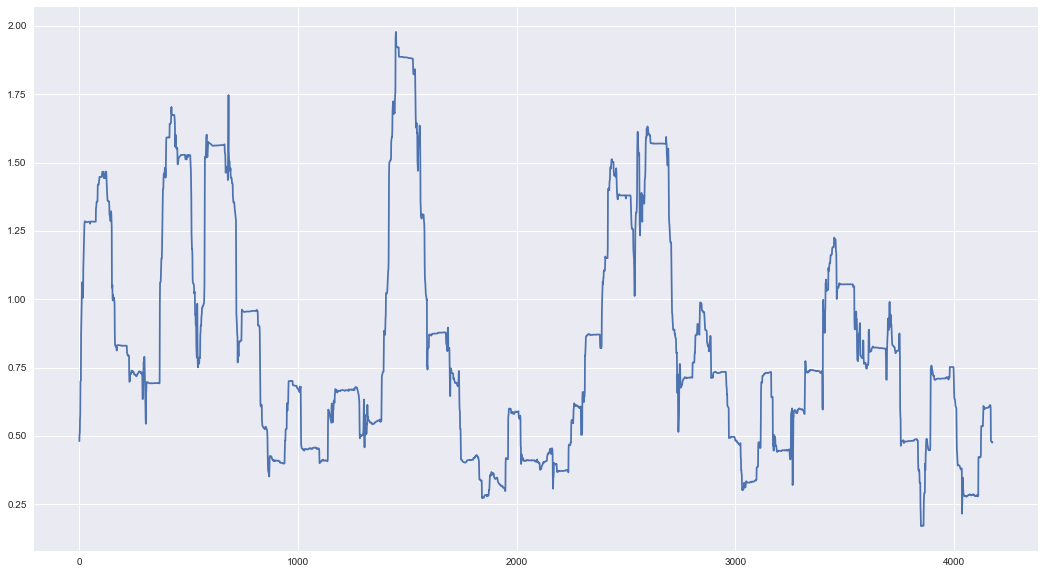

In [163]:
plt.figure(figsize = (18, 10))
plt.plot(dist_list)
plt.show()

In [165]:
n_dist = dist_list/np.max(dist_list)

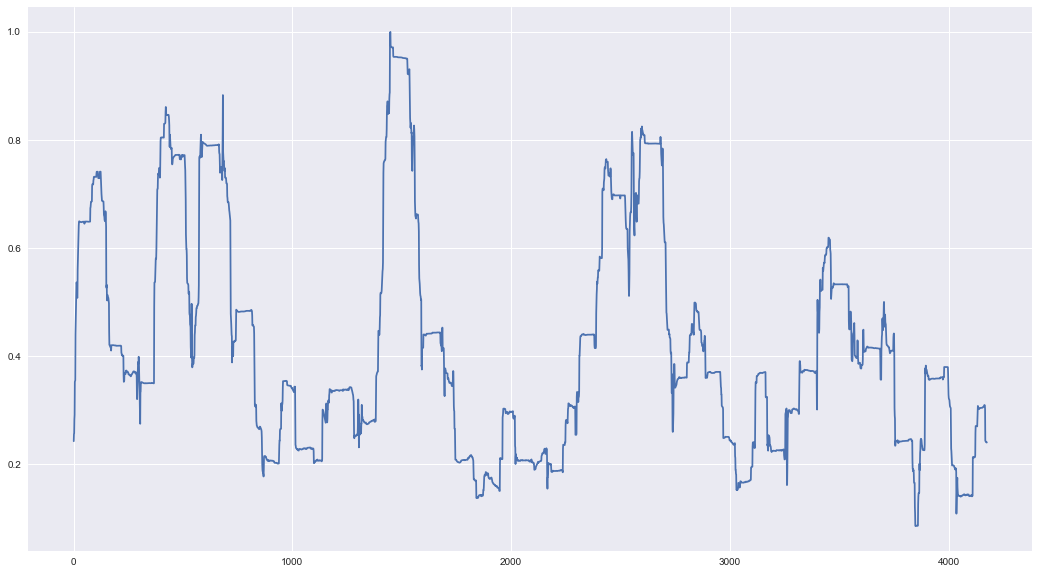

In [166]:
plt.figure(figsize = (18, 10))
plt.plot(n_dist)
plt.show()